<a href="https://colab.research.google.com/github/FilipeFariaDias/heart-atack-supervised-ml-project-/blob/main/Ataque_Cardiaco_Aprendizado_de__Maquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predição de ataque cardíaco

Dado o dataset fornecido, devemos ser capaz de criar diversos modeloes e avaliar a capacidade de predição de cada um deles para esse problema.

### Instalando pacotes e importando bibliotecas

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

### Montando o Google Drive para poder usar o dataset sem fazer updload

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #montando o google drive para não precisar ficar colocando os dados toda hora

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/data/heart.csv") #carregando o dataset

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Explorando o dataset

Descrição do conjunto de dados


*   age: Idade do paciente

*   sex: Sexo do paciente

  *   0: feminino

  *   1: masculino

*   cp: tipo de dor no peito

  *   1: angina típica

  *   2: angina atípica

  *   3: dor não anginosa

  *   4: assintomática

*   trtbps - pressão arterial em repouso (em mm de Hg na admissão no hospital)

*   chol: colesterol em mg/dL (miligramas de glicose por decilitro de sangue)  obtida apartir de um sensor de IMC

*   fbs: se o açucar no sangue em repouso é maior do que 120mg/dL (0 - falso, 1 - verdadeiro)

  *   0: falso

  *   1: verdadeiro

*   _restecg: resultados eletrocardiograficos em repouso
  
  *   0: normal

  *   1: anormalidade da onda ST-T

  *   2: hipertrofia

*   thalach: máxima frequência cardíaca alcançada

*   exang: Angina induzida por exercicio

  *   0: não

  *   1: sim

*   oldpeak: depressão de ST induzida por exercício em relação ao repouso

*   slope: a inclinação do pico do exercício de segmento ST

  *   0: descendente

  *   1: plano

  *   2: crescente

*   ca: numero de vasos principais coloridos por fluoroscopia (0 até 3)

*   thal: doença sanguínea chamada talassemia 2 = normal; 1 = fixed defect; 3 = reversable defect

  *   1: defeito corrigido

  *   2: defeito reversível

  *   3: normal

* target: diagnóstico de doença cardíaca:

  *   0: menos chance de um ataque cardíaco
  *   1: mais chance de um ataque cardíaco

Verificando a distribuição da classe predita no dataset

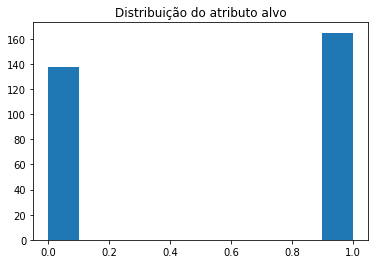

Instancias com saída 0: 138 (45.54%)
Instancias com saída 1: 165 (54.46%)


In [ ]:
output_zero = df['output'].value_counts()[0]
output_one = df['output'].value_counts()[1]

plt.hist(df['output'])
plt.title("Distribuição do atributo alvo")
plt.show()

print(f"Instancias com saída 0: {output_zero} ({100 * output_zero / (output_zero + output_one):.2f}%)")
print(f"Instancias com saída 1: {output_one} ({100 * output_one / (output_zero + output_one):.2f}%)")

Os dados não possuem um desbalanceamento tão grande, agora vamos verificar como é composto o nosso dataset, ou seja o que temos em cada coluna. Agora vamos verificar a quantidade de colunas que o nosso dataset possui

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Vamos renomear as colunas para que fiquem com o nome completo de cada feature, assim será possível interpretar melhor cada coluna

In [ ]:
df.rename(columns={
    "cp": "chest_pain",
    "trtbps": "resting_blood_pressure",
    "chol": "cholesterol",
    "fbs": "fasting_blood_sugar",
    "restecg": "resting_electrocardiographic",
    "thalachh": "maximum_heart_rate",
    "exng": "exercise_induced_angina",
    "slp": "slope",
    "caa": "number_vessels",
})

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,number_vessels,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Plotando os valores numéricos para verificar a presença de outliers, algo que não está muito presente


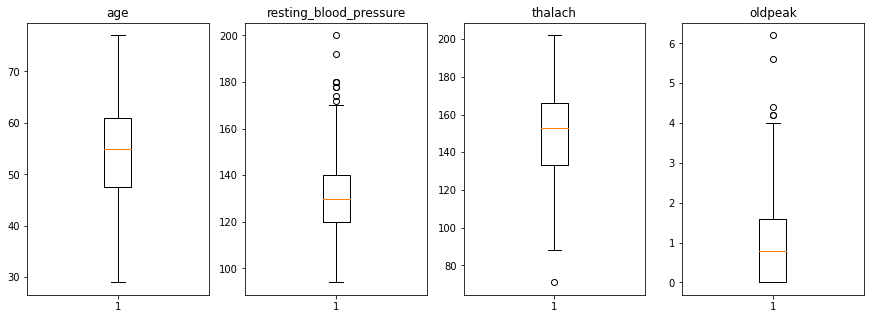

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 5))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("resting_blood_pressure")

ax3.boxplot(df["thalachh"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

### Limpeza do dataset

Verificando a quantidade de dados duplicados e removendo-os

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace = True)

Agora ocorre a análise se existem valores nulos no dataset

In [ ]:
for column in df.columns:
    miss_count = df[column].isnull().sum()
    print(f'{column}: {miss_count :.1%}')

age: 0.0%
sex: 0.0%
cp: 0.0%
trtbps: 0.0%
chol: 0.0%
fbs: 0.0%
restecg: 0.0%
thalachh: 0.0%
exng: 0.0%
oldpeak: 0.0%
slp: 0.0%
caa: 0.0%
thall: 0.0%
output: 0.0%


Eliminando colunas com menor relevância

In [ ]:
#df = df.drop('age', axis=1)
#df = df.drop('sex', axis=1)
#df = df.drop('cp', axis=1)
#df = df.drop('trtbps', axis=1)
#df = df.drop('chol', axis=1)
#df = df.drop('restecg', axis=1)
#df = df.drop('thalachh', axis=1)
#df = df.drop('exng', axis=1)
#df = df.drop('slp', axis=1)
#df = df.drop('caa', axis=1)
#df = df.drop('oldpeak', axis=1)
#df = df.drop('thall', axis=1)

### Divisão dos folds

A partir desse código fazemos a divisão em k-folds, basicamente criamos 2 arrays, um array recebe k partições com a classe predita positiva e o outro recebe k partições da parte negativa. Por fim, criamos um array final que é o merge da partição positiva com a negativa, com tamanho de k folds

In [ ]:
def get_kfolds(k, data):
  data_negative = df.loc[df['output'] == 0]
  data_positive = df.loc[df['output'] == 1]

  fold_negative = np.array_split(data_negative, k)
  fold_positive = np.array_split(data_positive, k)

  fold_final = []
  for i in range(0, k):
    merge = [fold_negative[i], fold_positive[i]]
    temp = pd.concat(merge)

    fold_final.append(temp)
  return fold_final

Neste trecho ocorre a divisão dos k-folds, onde k-1 folds são usados para treinamento e 1 fold para testes. Esse processo é repetido k vezes, onde o fold de teste é variado a cada iteração

In [ ]:
def kfold(k, data, model, shuffle=False): #k-fold cross validation estratificado
  if shuffle == True:
    data.sample(frac=1).reset_index(drop=True)

  folds = get_kfolds(k, data) #folds estratificados

  accuracies = []
  recalls = []
  precisions = []
  fscores = []
  result = []

  for i in range(k):
    testing_fold = folds[i]

    training_folds = []
    for j in range(k):
      if j != i:
        training_folds.append(folds[j])

    X_train = training_folds[i if i != j else i - 1].drop(['output'], axis=1)
    y_train = training_folds[i if i != j else i - 1]['output'].values

    X_test = testing_fold.drop(['output'], axis=1)
    y_test = testing_fold['output'].values

    X_train, X_test = normalize(X_train, X_test)

    model.fit(X_train, y_train)
    predict = model.predict(X_test)

    results = confusion_matrix(predict, y_test)
    accuracies.append(results[0])
    recalls.append(results[1])
    precisions.append(results[2])
    fscores.append(results[3])

  print(f"Standard Deviation: {np.std(accuracies)}")
  print(f"Accuracy: {sum(accuracies) / len(accuracies)}")
  print(f"Recall: {sum(recalls) / len(recalls)}")
  print(f"Precision: {sum(precisions) / len(precisions)}")
  print(f"F-score: {sum(fscores) / len(fscores)}")

  print_acc_bar_chart(k, accuracies, "Acuracias por iterações")

  return accuracies

Optamos por normalizar os valores por meio da normalização min_max

In [ ]:
def normalize(data_train, data_test):
  column = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

  for feature in column:
    max = data_train.max(axis=0)[feature]
    min = data_train.min(axis=0)[feature]
    for index, row in data_train.iterrows():
      data_train.loc[index, [feature]] = (row[feature] - min) / (max - min)
    for index, row in data_test.iterrows():
      data_test.loc[index, [feature]] = (row[feature] - min) / (max - min)

  return data_train, data_test

Esta é a implementação da matriz de confusão, foi utilizado o dicionário para facilitar a interpretabilidade. Ela recebe a predição do modelo e a saída real, a partir disso alimentamos a matriz e conseguimos extrair as métricas solicitadas.

In [ ]:
def confusion_matrix(predict, real):
  matrix = {"TP": 0, "FP": 0, "TN": 0, "FN": 0}
  for i in range(len(real)):
    if(real[i] == 1):
      if(predict[i] == 1):
        matrix['TP'] += 1
      else:
        matrix['FP'] += 1
    else:
      if(predict[i] == 1):
        matrix['FN'] += 1
      else:
        matrix['TN'] += 1

  accuracy = (matrix['TP'] + matrix['TN']) / (matrix['TP'] + matrix['TN'] + matrix['FP'] + matrix['FN'])
  recall = matrix['TP'] / (matrix['TP'] + matrix['FN'])
  precision = matrix['TP'] / (matrix['TP'] + matrix['FP'])
  fscore = 2 * ((precision * recall) / (precision + recall))

  return [accuracy, recall, precision, fscore]


In [ ]:
def print_acc_bar_chart(k, accuracies, title):
  k_list = [i for i in range(1, k+1)]
  fig = plt.figure(figsize = (10, 5))
  accuracies_formated = [ '%.4f' % acc for acc in accuracies]
  bar_plot = plt.bar(k_list, accuracies, color='brown')
  plt.bar_label(bar_plot, labels=accuracies_formated, label_type='center')

  plt.xlabel("Numero de iteração")
  plt.ylabel("Acuracia")
  plt.title(title)
  plt.show()

In [ ]:
def print_model_bar_chart(k, accuracies, title):
  fig = plt.figure(figsize = (20, 7))
  bar_plot = plt.bar(k, accuracies, color='brown')
  accuracies_formated = [ '%.4f' % acc for acc in accuracies]
  plt.bar_label(bar_plot, labels=accuracies_formated, label_type='center')

  plt.xlabel("Modelos")
  plt.ylabel("Acuracia")
  plt.title(title)
  plt.show()

Na célula abaixo ocorre o instanciamento dos algoritmos de Machine Learning e a chamada para o método kfold, onde ocorre a divisão dos folds, a normalização e o treinamento do modelo

KNeighborsClassifier()
Standard Deviation: 0.05369018022844815
Accuracy: 0.8105714550338057
Recall: 0.7946468847176952
Precision: 0.8840909090909091
F-score: 0.8346852127063125


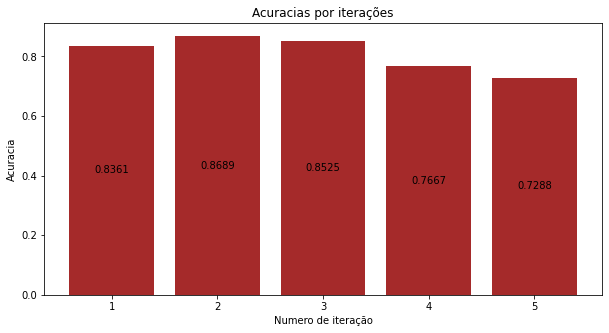

DecisionTreeClassifier()
Standard Deviation: 0.09104329221329287
Accuracy: 0.6714346577753079
Recall: 0.6720456031382807
Precision: 0.7863636363636364
F-score: 0.7216253590043612


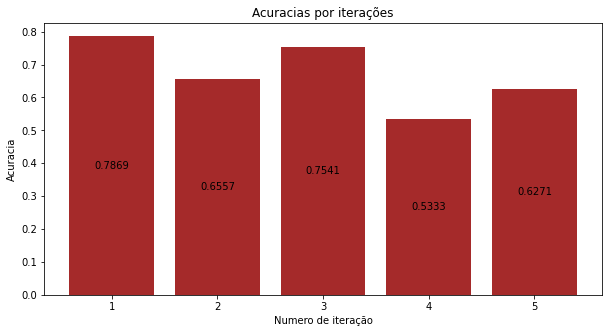

AdaBoostClassifier(n_estimators=100)
Standard Deviation: 0.029678426267665512
Accuracy: 0.7647281652310827
Recall: 0.7764720942140297
Precision: 0.8053030303030303
F-score: 0.7874245915024478


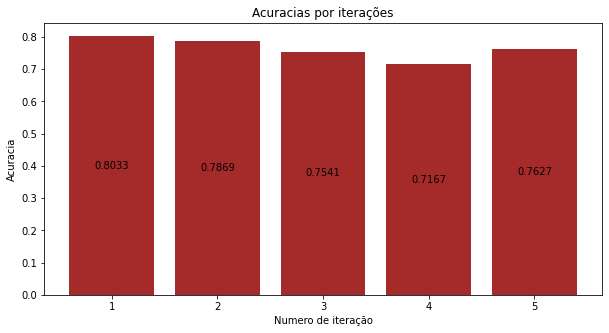

RandomForestClassifier(n_estimators=10)
Standard Deviation: 0.030593570881957008
Accuracy: 0.7646170232471983
Recall: 0.8258280013563661
Precision: 0.7196969696969696
F-score: 0.7681076483810217


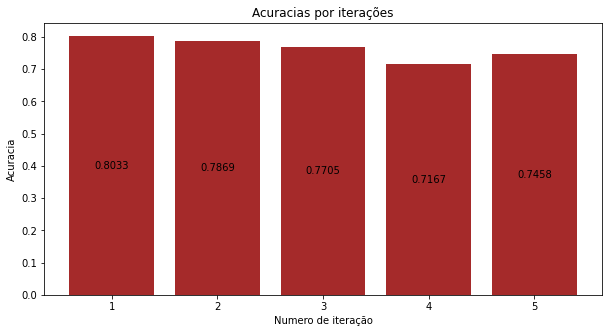

LogisticRegression()
Standard Deviation: 0.05650088388217554
Accuracy: 0.8007372418264331
Recall: 0.8080895806702258
Precision: 0.8356060606060607
F-score: 0.8196535934977455


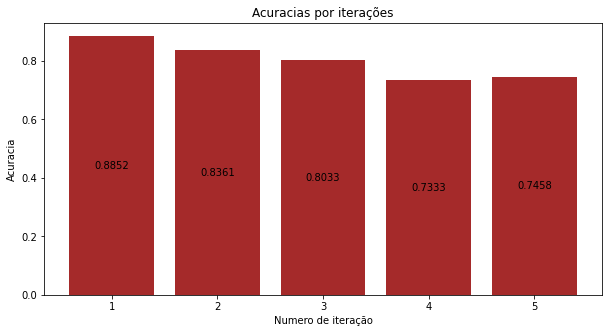

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 2), random_state=1,
              solver='lbfgs')
Standard Deviation: 0.05018327613055408
Accuracy: 0.7779503565805316
Recall: 0.8337378750281974
Precision: 0.7503787878787878
F-score: 0.7830446229155139


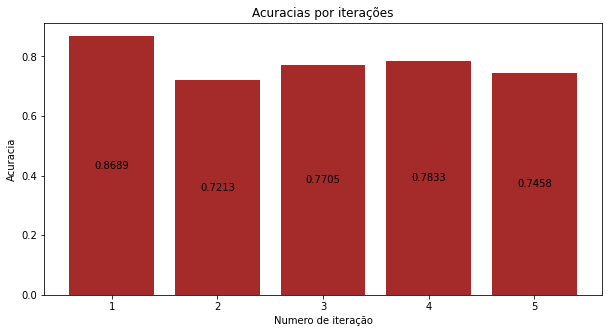

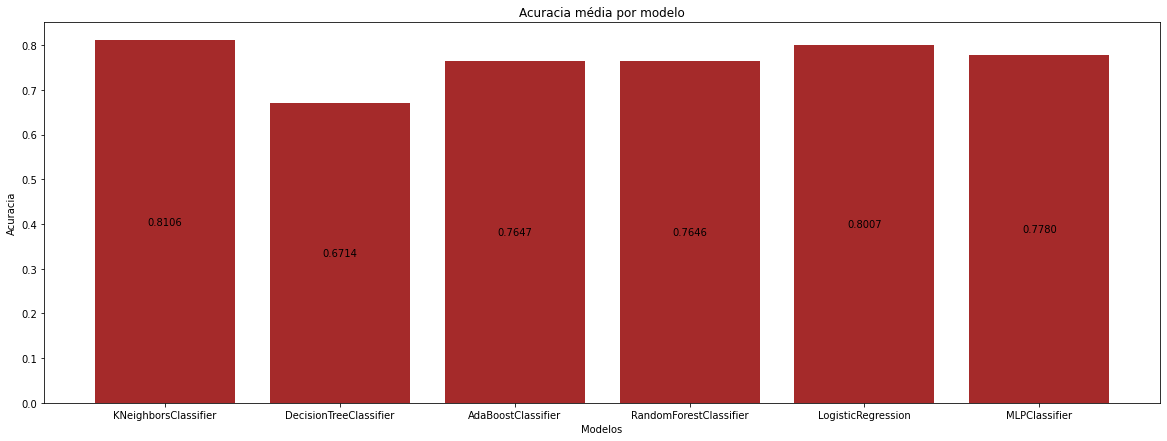

In [ ]:
shuffle = True
results = []
models_name = []

knn = KNeighborsClassifier()
print(knn)
knn_accs = kfold(5, df, knn, shuffle)
knn_mean = np.mean(knn_accs)
results.append(knn_mean)
models_name += ['KNeighborsClassifier']

print(f'==================================================================')
dt = DecisionTreeClassifier()
print(dt)
dt_accs = kfold(5, df, dt, shuffle)
dt_mean = np.mean(dt_accs)
results.append(dt_mean)
models_name += ['DecisionTreeClassifier']

print(f'==================================================================')
abc = AdaBoostClassifier(n_estimators=100)
print(abc)
abc_accs = kfold(5, df, abc, shuffle)
abc_mean = np.mean(abc_accs)
results.append(abc_mean)
models_name += ['AdaBoostClassifier']

print(f'==================================================================')
rfc = RandomForestClassifier(n_estimators=10)
print(rfc)
rfc_accs = kfold(5, df, rfc, shuffle)
rfc_mean = np.mean(rfc_accs)
results.append(rfc_mean)
models_name += ['RandomForestClassifier']

print(f'==================================================================')
clf = LogisticRegression()
print(clf)
clf_accs = kfold(5, df, clf, shuffle)
clf_mean = np.mean(clf_accs)
results.append(clf_mean)
models_name += ['LogisticRegression']

print(f'==================================================================')
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 2), random_state=1)
print(mlp)
mlp_accs = kfold(5, df, mlp, shuffle)
mlp_mean = np.mean(mlp_accs)
results.append(mlp_mean)
models_name += ['MLPClassifier']

print_model_bar_chart(models_name, results, 'Acuracia média por modelo')
